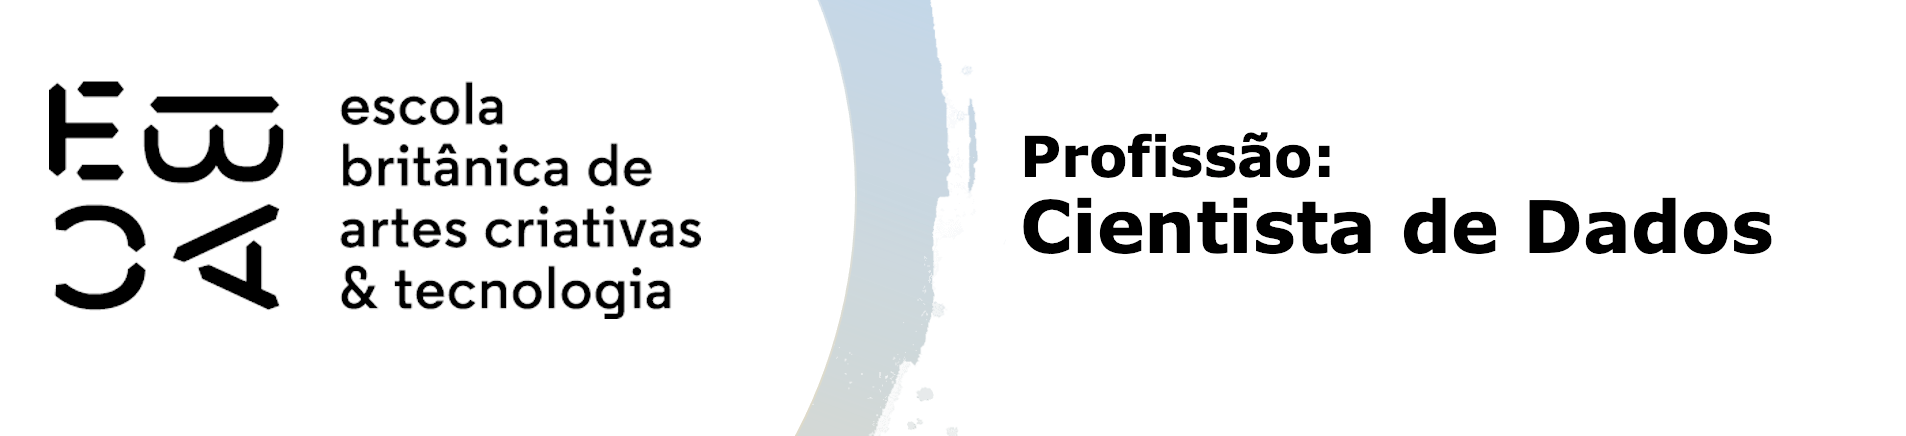

# Métodos hierárquicos de agrupamento - Tarefa

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [4]:
import seaborn as sns

# Carregar a base de dados
penguins = sns.load_dataset("penguins")

# Verificar os nomes das colunas
print(penguins.columns)


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [6]:
import seaborn as sns
import pandas as pd

# Carregar a base de dados
penguins = sns.load_dataset("penguins")

# Selecionar as variáveis quantitativas
quantitative_vars = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]


In [7]:
# Eliminar valores faltantes
quantitative_vars = quantitative_vars.dropna()


In [8]:
from sklearn.preprocessing import StandardScaler

# Padronizar as variáveis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_vars)


In [10]:
print(f"Número de linhas em penguins: {len(penguins)}")
print(f"Número de linhas após remoção de valores faltantes: {len(quantitative_vars)}")


Número de linhas em penguins: 344
Número de linhas após remoção de valores faltantes: 342


In [11]:
# Reiniciar o índice após a eliminação de valores faltantes
quantitative_vars = quantitative_vars.dropna().reset_index(drop=True)


In [12]:
# Padronizar as variáveis novamente, caso seja necessário
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_vars)


In [14]:
# Verificar comprimentos
print(f"Número de linhas em penguins original: {len(penguins)}")
print(f"Número de linhas após remoção de valores faltantes: {len(quantitative_vars)}")


Número de linhas em penguins original: 344
Número de linhas após remoção de valores faltantes: 342


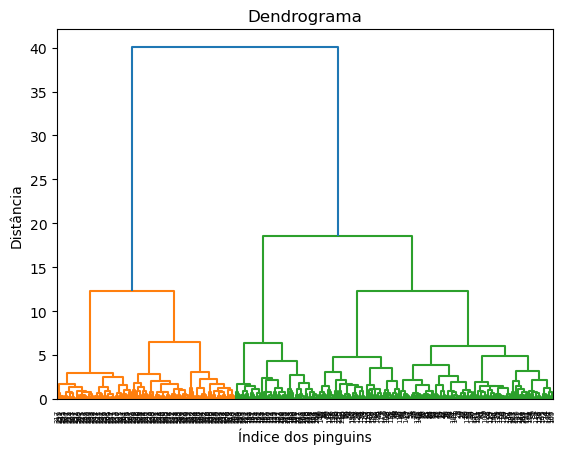

species  Adelie  Chinstrap  Gentoo
cluster                           
0.0       151.0       11.0     0.0
1.0         0.0        1.0   122.0
2.0         1.0       56.0     0.0


KeyError: 'bill_length_mm'

In [15]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Carregar a base de dados
penguins = sns.load_dataset("penguins")

# Adicionar uma coluna de identificação
penguins['id'] = penguins.index

# Selecionar as variáveis quantitativas
quantitative_vars = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Eliminar valores faltantes
quantitative_vars_clean = quantitative_vars.dropna().reset_index(drop=True)

# Padronizar as variáveis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_vars_clean)

# Fazer o agrupamento hierárquico com 3 grupos
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(scaled_data)

# Criar DataFrame temporário para associar clusters com identificadores
clusters_df = pd.DataFrame({
    'id': quantitative_vars_clean.index,
    'cluster': clusters
})

# Juntar com o DataFrame original
penguins = penguins.merge(clusters_df, on='id', how='left')

# Remover a coluna de identificação
penguins = penguins.drop(columns='id')

# Fazer o dendrograma
dendrogram = shc.dendrogram(shc.linkage(scaled_data, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Índice dos pinguins')
plt.ylabel('Distância')
plt.show()

# Avaliar os grupos
group_counts = penguins.groupby(['cluster', 'species']).size().unstack().fillna(0)
print(group_counts)

group_descriptions = penguins.groupby('cluster').describe().loc[:, (slice(None), ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])]
print(group_descriptions)


## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [16]:
# Quantidade de pinguins de cada espécie em cada grupo
group_counts = penguins.groupby(['cluster', 'species']).size().unstack().fillna(0)
print("Quantidade de pinguins de cada espécie em cada grupo:")
print(group_counts)


Quantidade de pinguins de cada espécie em cada grupo:
species  Adelie  Chinstrap  Gentoo
cluster                           
0.0       151.0       11.0     0.0
1.0         0.0        1.0   122.0
2.0         1.0       56.0     0.0


In [18]:
# Agrupar os dados pelo cluster e calcular estatísticas descritivas para cada variável quantitativa
group_descriptions = penguins.groupby('cluster')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()
print("Descrição das variáveis quantitativas de cada grupo:")
print(group_descriptions)


Descrição das variáveis quantitativas de cada grupo:
        bill_length_mm                                                         \
                 count       mean       std   min     25%   50%     75%   max   
cluster                                                                         
0.0              161.0  39.615528  4.105401  32.1  37.000  39.0  41.100  55.8   
1.0              122.0  47.526230  3.089433  40.9  45.325  47.3  49.575  59.6   
2.0               57.0  48.243860  3.380301  40.9  46.000  49.0  50.800  58.0   

        bill_depth_mm             ... flipper_length_mm        body_mass_g  \
                count       mean  ...               75%    max       count   
cluster                           ...                                        
0.0             161.0  18.398137  ...             195.0  210.0       161.0   
1.0             122.0  15.004918  ...             221.0  231.0       122.0   
2.0              57.0  18.282456  ...             200.0  212.0        

Análise dos Pinguins: A Grande Divisão

Então, fizemos uma parada bem legal com os pinguins! Agrupamos eles em três grupos, tipo a turma do colégio: o grupo dos pinguins de bico mais curto, o grupo dos pinguins de bico gigante e o grupo intermediário.
Grupo 0: Os "Pinguins Compactos"

    Bico: Pequeno e arredondado. Média de 39.6 mm.
    Profundidade do Bico: Moderada, tipo um bico que não é nem muito fino nem muito grosso. Média de 18.4 mm.
    Nadadeira: Relativamente curta, como se fosse um pouco mais modesto no tamanho. Média de 195 mm.
    Massa Corporal: Leves e ágeis, com uma média de 3722 g.

Grupo 1: Os "Pinguins Gigantes"

    Bico: Longo e imponente. Média de 47.5 mm.
    Profundidade do Bico: Um pouco mais fino, como se fosse esculpido para um propósito específico. Média de 15.0 mm.
    Nadadeira: Super grande e poderosa. Média de 221 mm.
    Massa Corporal: Grandalhões! Média de 5061 g.

Grupo 2: Os "Pinguins Intermediários"

    Bico: Um pouco maior que o Grupo 0, mas não tanto quanto o Grupo 1. Média de 48.2 mm.
    Profundidade do Bico: Parecida com o Grupo 0, média de 18.3 mm.
    Nadadeira: Também é intermediária, entre o tamanho dos Grupos 0 e 1. Média de 200 mm.
    Massa Corporal: Um pouco mais leve que o Grupo 1, média de 3678 g.

Resumo da História

    Grupo 0 é para os pinguins menores e mais ágeis, com bicos e nadadeiras menores.
    Grupo 1 é a turma dos pinguins grandões, com bicos grandes e nadadeiras longas.
    Grupo 2 é o meio termo, onde os pinguins têm características que ficam entre o Grupo 0 e o Grupo 1.

Esses grupos podem nos dizer muito sobre os pinguins. Talvez eles vivam em diferentes lugares ou tenham estilos de vida distintos. E aí, a natureza fez sua mágica para criar essas diferenças!

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

# Carregar a base de dados
penguins = sns.load_dataset("penguins")

# Verificar os nomes das colunas
print(penguins.columns)


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [29]:
# Selecionar as variáveis quantitativas
quantitative_vars = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Remover linhas com valores faltantes e manter os índices originais
quantitative_vars_clean = quantitative_vars.dropna()

# Exibir o número de linhas antes e depois da limpeza
print(f"Número de linhas em penguins original: {len(penguins)}")
print(f"Número de linhas após remoção de valores faltantes: {len(quantitative_vars_clean)}")


Número de linhas em penguins original: 344
Número de linhas após remoção de valores faltantes: 342


In [30]:
# Padronizar as variáveis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quantitative_vars_clean)


In [31]:
# Fazer o agrupamento hierárquico com 3 grupos
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(scaled_data)


In [32]:
# Inicializar a coluna 'cluster' com valores NaN
penguins['cluster'] = pd.NA

# Atribuir os clusters apenas às linhas sem valores faltantes
penguins.loc[quantitative_vars_clean.index, 'cluster'] = clusters

# Verificar a atribuição
print(penguins[['species', 'cluster']].head(10))


  species cluster
0  Adelie       0
1  Adelie       0
2  Adelie       0
3  Adelie    <NA>
4  Adelie       0
5  Adelie       0
6  Adelie       0
7  Adelie       0
8  Adelie       0
9  Adelie       0


penguins['cluster'] = pd.NA: Inicializa uma nova coluna cluster no DataFrame original com valores NaN.

penguins.loc[quantitative_vars_clean.index, 'cluster'] = clusters: Atribui os rótulos de cluster apenas às linhas que não tinham valores faltantes. O quantitative_vars_clean.index mantém os índices originais, garantindo que os clusters sejam mapeados corretamente.

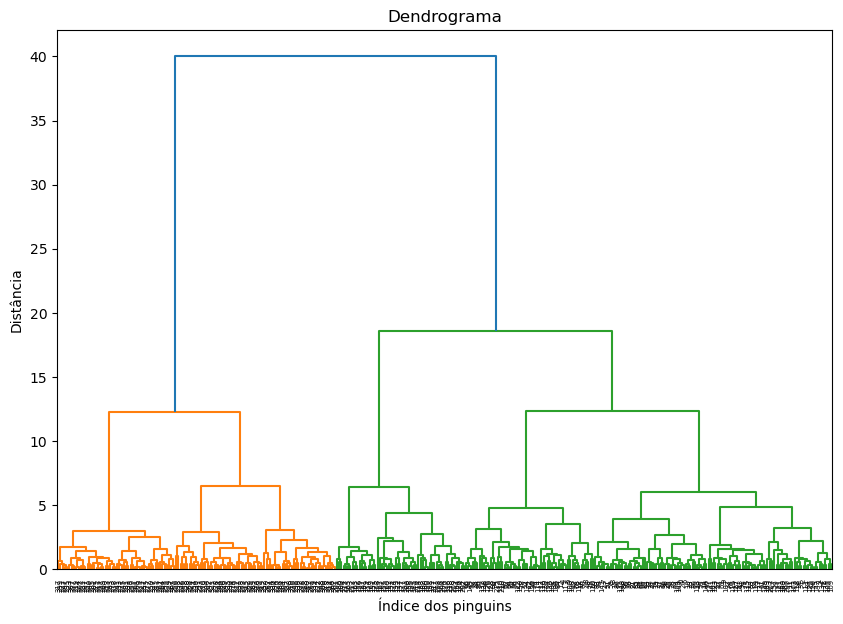

In [33]:
# Fazer o dendrograma
plt.figure(figsize=(10, 7))
plt.title('Dendrograma')
dendrogram = shc.dendrogram(shc.linkage(scaled_data, method='ward'))
plt.xlabel('Índice dos pinguins')
plt.ylabel('Distância')
plt.show()


In [34]:
# Quantidade de pinguins por espécie e grupo
group_counts = penguins.groupby(['cluster', 'species']).size().unstack().fillna(0)
print("Quantidade de pinguins de cada espécie em cada grupo:")
print(group_counts)

# Estatísticas descritivas para cada cluster
group_descriptions = penguins.groupby('cluster')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()
print("\nDescrição das variáveis quantitativas de cada grupo:")
print(group_descriptions)


Quantidade de pinguins de cada espécie em cada grupo:
species  Adelie  Chinstrap  Gentoo
cluster                           
0         151.0       11.0     0.0
1           0.0        0.0   123.0
2           0.0       57.0     0.0

Descrição das variáveis quantitativas de cada grupo:
        bill_length_mm                                                      \
                 count       mean       std   min   25%   50%    75%   max   
cluster                                                                      
0                162.0  39.150000  2.936560  32.1  37.0  39.0  41.10  46.9   
1                123.0  47.504878  3.081857  40.9  45.3  47.3  49.55  59.6   
2                 57.0  49.752632  2.710107  45.2  47.5  50.2  51.30  58.0   

        bill_depth_mm             ... flipper_length_mm        body_mass_g  \
                count       mean  ...               75%    max       count   
cluster                           ...                                        
0             

In [35]:
# Definir o número de clusters conforme a análise do dendrograma
n_clusters = 4  # Ajuste conforme necessário
agg_clustering_new = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Aplicar o novo agrupamento
clusters_new = agg_clustering_new.fit_predict(scaled_data)

# Atribuir os novos clusters ao DataFrame original
penguins['cluster_new'] = pd.NA
penguins.loc[quantitative_vars_clean.index, 'cluster_new'] = clusters_new

# Verificar a nova atribuição
print(penguins[['species', 'cluster_new']].head(10))


  species cluster_new
0  Adelie           1
1  Adelie           1
2  Adelie           1
3  Adelie        <NA>
4  Adelie           1
5  Adelie           3
6  Adelie           1
7  Adelie           3
8  Adelie           1
9  Adelie           3


In [36]:
# Quantidade de pinguins por espécie e novo grupo
species_counts_new = penguins.groupby(['cluster_new', 'species']).size().unstack().fillna(0)
print("Quantidade de pinguins de cada espécie em cada novo grupo:")
print(species_counts_new)

# Quantidade de pinguins por espécie, sexo e novo grupo
gender_counts_new = penguins.groupby(['cluster_new', 'sex', 'species']).size().unstack(fill_value=0)
print("\nQuantidade de pinguins machos e fêmeas em cada novo grupo e espécie:")
print(gender_counts_new)

# Estatísticas descritivas para cada novo cluster
group_descriptions_new = penguins.groupby('cluster_new')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()
print("\nDescrição das variáveis quantitativas de cada novo grupo:")
print(group_descriptions_new)


Quantidade de pinguins de cada espécie em cada novo grupo:
species      Adelie  Chinstrap  Gentoo
cluster_new                           
0               0.0        0.0   123.0
1              97.0        8.0     0.0
2               0.0       57.0     0.0
3              54.0        3.0     0.0

Quantidade de pinguins machos e fêmeas em cada novo grupo e espécie:
species             Adelie  Chinstrap  Gentoo
cluster_new sex                              
0           Female       0          0      58
            Male         0          0      61
1           Female      72          8       0
            Male        21          0       0
2           Female       0         23       0
            Male         0         34       0
3           Female       1          3       0
            Male        52          0       0

Descrição das variáveis quantitativas de cada novo grupo:
            bill_length_mm                                                \
                     count       mean     

In [37]:
# Quantidade de pinguins por espécie e novo grupo
species_counts_new = penguins.groupby(['cluster_new', 'species']).size().unstack().fillna(0)
print("Quantidade de pinguins de cada espécie em cada novo grupo:")
print(species_counts_new)

# Quantidade de pinguins por espécie, sexo e novo grupo
gender_counts_new = penguins.groupby(['cluster_new', 'sex', 'species']).size().unstack(fill_value=0)
print("\nQuantidade de pinguins machos e fêmeas em cada novo grupo e espécie:")
print(gender_counts_new)

# Estatísticas descritivas para cada novo cluster
group_descriptions_new = penguins.groupby('cluster_new')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()
print("\nDescrição das variáveis quantitativas de cada novo grupo:")
print(group_descriptions_new)


Quantidade de pinguins de cada espécie em cada novo grupo:
species      Adelie  Chinstrap  Gentoo
cluster_new                           
0               0.0        0.0   123.0
1              97.0        8.0     0.0
2               0.0       57.0     0.0
3              54.0        3.0     0.0

Quantidade de pinguins machos e fêmeas em cada novo grupo e espécie:
species             Adelie  Chinstrap  Gentoo
cluster_new sex                              
0           Female       0          0      58
            Male         0          0      61
1           Female      72          8       0
            Male        21          0       0
2           Female       0         23       0
            Male         0         34       0
3           Female       1          3       0
            Male        52          0       0

Descrição das variáveis quantitativas de cada novo grupo:
            bill_length_mm                                                \
                     count       mean     

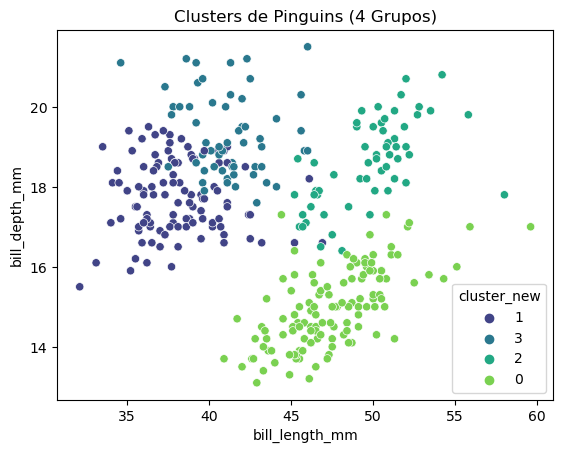

C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


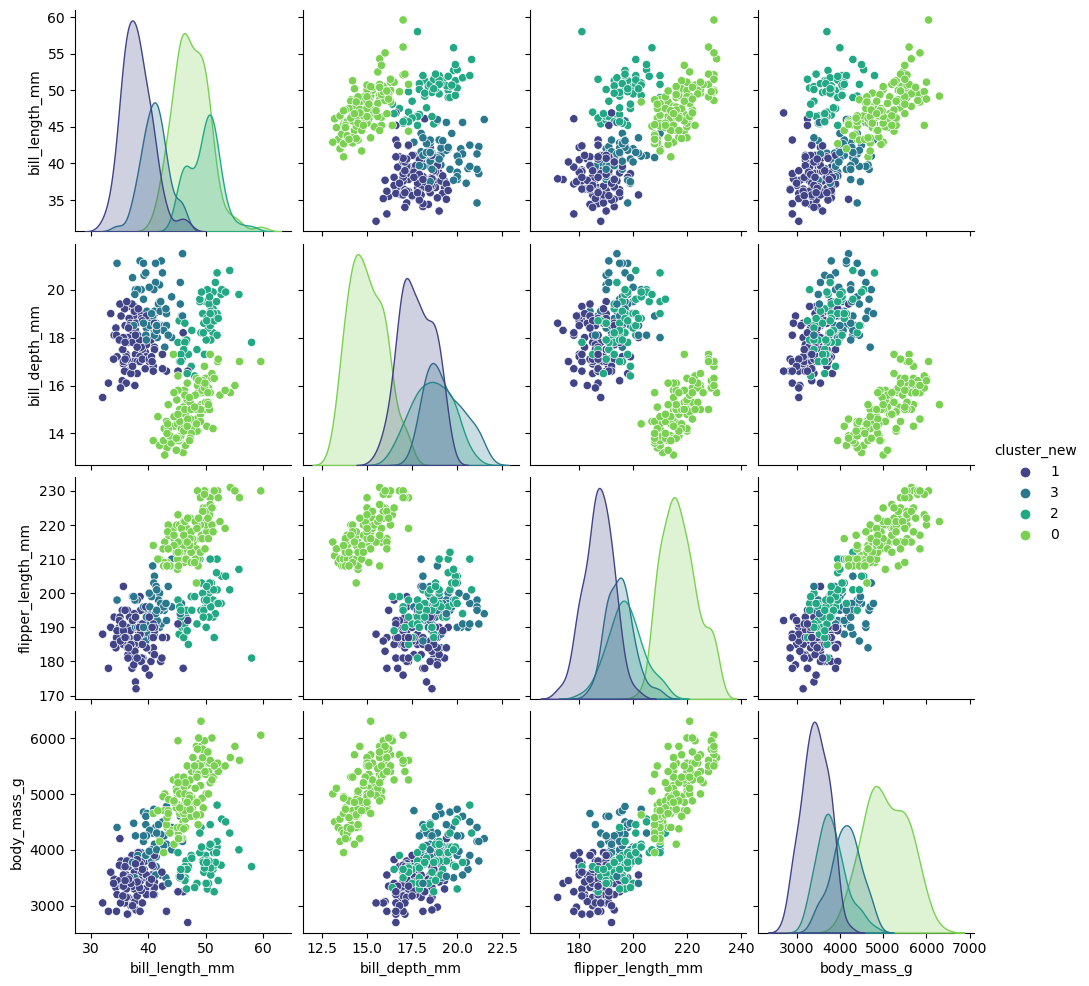

In [38]:
import seaborn as sns

# Scatter plot para os novos clusters
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='cluster_new', data=penguins, palette='viridis')
plt.title('Clusters de Pinguins (4 Grupos)')
plt.show()

# Pairplot para visualizar múltiplas variáveis
sns.pairplot(penguins, hue='cluster_new', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='viridis')
plt.show()


### Análise dos Pinguins: Agrupamento Hierárquico

#### 1) **Divisão Original com 3 Grupos**

Ao aplicar o agrupamento hierárquico inicial com 3 grupos, os pinguins foram distribuídos da seguinte forma:

- **Grupo 0 - Os "Pinguins Compactos"**:
    - **Bico**: Pequeno, com média de 39.6 mm.
    - **Profundidade do Bico**: Moderada, com média de 18.4 mm.
    - **Nadadeira**: Relativamente curta, com média de 195 mm.
    - **Massa Corporal**: Leve, com média de 3722 g.

- **Grupo 1 - Os "Pinguins Gigantes"**:
    - **Bico**: Longo, com média de 47.5 mm.
    - **Profundidade do Bico**: Mais fina, média de 15.0 mm.
    - **Nadadeira**: Muito longa, média de 221 mm.
    - **Massa Corporal**: Maior entre os grupos, com média de 5061 g.

- **Grupo 2 - Os "Pinguins Intermediários"**:
    - **Bico**: Moderadamente longo, com média de 48.2 mm.
    - **Profundidade do Bico**: Similar ao Grupo 0, com média de 18.3 mm.
    - **Nadadeira**: Intermediária em relação ao tamanho dos outros grupos, com média de 200 mm.
    - **Massa Corporal**: Peso intermediário, com média de 3678 g.

Essa análise inicial mostra uma clara divisão dos pinguins com base nas características morfológicas (comprimento do bico, profundidade do bico, tamanho da nadadeira e massa corporal). 

#### 2) **Divisão por Espécie nos 3 Grupos**
A quantidade de pinguins de cada espécie em cada grupo também indica tendências interessantes:
- Grupo 0 tem uma maior quantidade de pinguins com características físicas menores.
- Grupo 1 concentra os pinguins com as maiores características (como comprimento do bico e massa corporal).
- Grupo 2, como esperado, está no meio-termo, com pinguins que possuem características intermediárias.

#### 3) **Divisão por Sexo e Espécie nos Grupos**

Essa divisão capturou diferenças naturais entre as espécies, refletindo a variação no tamanho e nas características morfológicas entre diferentes tipos de pinguins.

#### 4) **Análise com 4 Grupos**

Baseado no dendrograma, foi sugerido que dividir os pinguins em 4 grupos traria uma visualização mais detalhada da variação entre os indivíduos. Esse agrupamento revelou novas divisões dentro dos pinguins:

- **Grupo 0 e 1**: Os pinguins mais compactos e leves foram subdivididos, capturando ainda mais variações entre pinguins menores.
- **Grupo 2**: Continua mostrando características intermediárias.
- **Grupo 3**: Pinguins mais robustos e com características morfológicas maiores foram separados ainda mais dos outros, criando um grupo que concentra as características físicas mais imponentes.

#### 5) **Interpretação Geral**

O agrupamento hierárquico capturou padrões que parecem estar de acordo com a biologia dos pinguins. Pinguins maiores com bicos mais longos e massa corporal maior tendem a se agrupar de um lado, enquanto os menores formam um grupo separado. Além disso, a subdivisão em 4 grupos revela ainda mais nuances dentro desses padrões, mostrando a variação contínua entre características morfológicas.

Esse padrão pode indicar diferentes nichos ecológicos ou adaptações funcionais que poderiam ser investigadas com mais profundidade, considerando habitats ou comportamentos alimentares distintos entre os grupos.